In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [100]:
def f(x):
    return np.abs(x - 3) * (x ** 2 + 1)


x_min, x_max = 0, 4

In [101]:
x_list = np.arange(x_min, x_max, 0.05)
y_list = f(x_list)

In [102]:
k = 3
x_more = []
for i in range(len(x_list) - 1):
    d = x_list[i + 1] - x_list[i]
    delta = d / k
    for j in range(k):
        x_more.append(x_list[i] + delta * j)
x_more.append(x_list[-1])
x_more = np.array(x_more)

In [103]:
def get_linear_interp(x1, x2, y1, y2, xp):
    if x1 <= xp <= x2:
        yp = y1 + ((y2 - y1) / (x2 - x1)) * (xp - x1)
        return yp
    else:
        assert False  # @todo переделать


def get_linear_interp_all(x_list, y_list):
    x_new_list = []
    y_new_list = []
    for i in range(len(x_list) - 1):
        d = x_list[i + 1] - x_list[i]
        delta = d / k
        for j in range(k):
            x = x_list[i] + j * delta
            y = get_linear_interp(x_list[i], x_list[i + 1], y_list[i], y_list[i + 1], x)

            x_new_list.append(x)
            y_new_list.append(y)

    x_new_list.append(x_list[-1])
    y_new_list.append(y_list[-1])
    return x_new_list, y_new_list

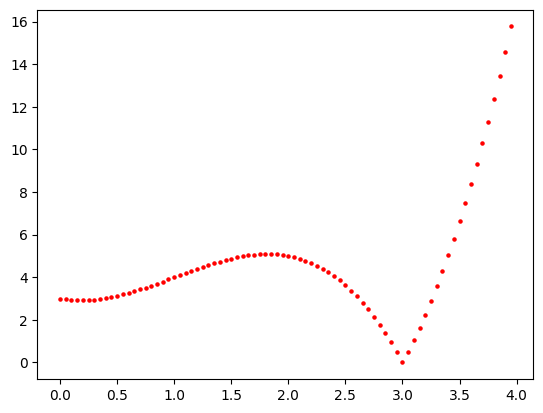

In [104]:
plt.scatter(x_list, y_list, s=5, c='r', zorder=2)

In [105]:
xs, ys = get_linear_interp_all(x_list, y_list)

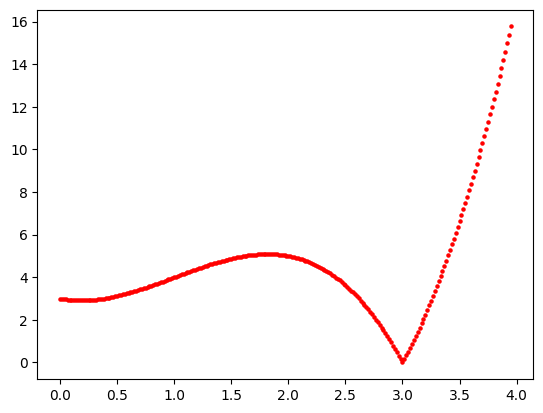

In [106]:
plt.scatter(xs, ys, s=5, c='r', zorder=2)

In [107]:
from functools import cache, lru_cache


@cache
def calc_separated_differences_new(f, i1, i2):
    """
    Посчитать разделенные суммы от l до r включительно
    """
    k = i2 - i1
    if k == 0:
        return f(x_list[i1])
    if k == 1:
        return (f(x_list[i1 + 1]) - f(x_list[i1])) / (x_list[i1 + 1] - x_list[i1])
    if k >= 2:
        f1 = calc_separated_differences_new(f, i1 + 1, i2)
        f2 = calc_separated_differences_new(f, i1, i2 - 1)
        return (f1 - f2) / (x_list[i2] - x_list[i1])


def inter(f, x_list, x):
    p = 0
    for k in range(len(x_list)):
        w = 1
        for j in range(k):
            w *= x - x_list[j]
        sep = calc_separated_differences_new(f, 0, k)
        p += sep * w
    return p

# x_list = [1.2, 1.3, 1.1, 1.4, 1.0]
# def f(x): return np.log(x)
# x = 1.23
# 
# for k in range(len(x_list)):
#     print(f'{k = }, sep = {calc_separated_differences_new(f, 0, k)}')
# 
# for k in range(len(x_list)):
#     print(f'{k = }, inter = {inter(f, x_list[:k + 1], x)}')
# 
# print(f(x_list[0]))

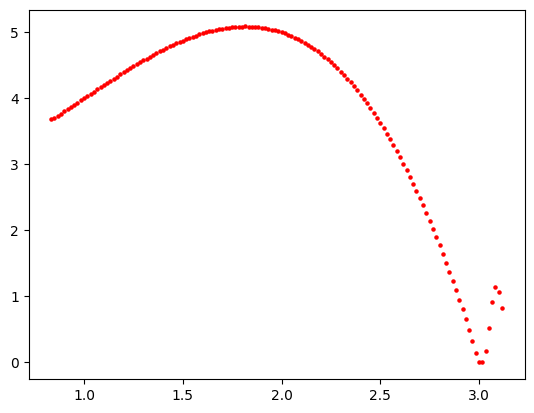

In [112]:
inter_list = []
for xp in x_more[50:-50]:
    inter_list.append(inter(f, x_list, xp))
plt.scatter(x_more[50:-50], inter_list, s=5, c='r', zorder=2)